In [1]:
volume = 'My Passport for Mac'
#volume = 'Data'

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

df_data0 = pd.read_csv(f'/Volumes/{volume}/IceModels/merged_model_input.csv')

dflakes = df_data0.drop_duplicates('lakecode')
dfnolakes = dflakes[dflakes.Depth_avg.isnull()]
dflakes= dflakes[~dflakes.Depth_avg.isnull()]

dfstations = pd.read_csv(f'/Volumes/{volume}/IceModels/topUSlakes_weather_stations.csv')



In [2]:
# should be 74 lakes
dflakes.shape

(74, 392)

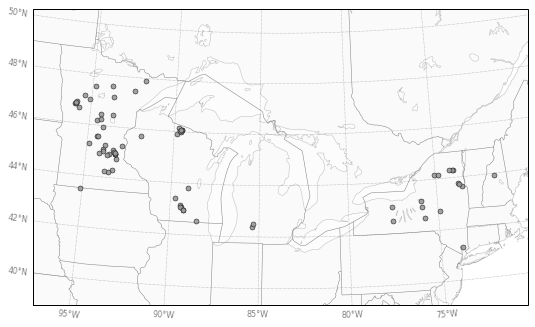

In [3]:
lat, lon = dflakes.drop_duplicates('lakecode')[['lat','lon']].T.values
lat_no, lon_no = dfnolakes.drop_duplicates('lakecode')[['lat','lon']].T.values

#plt.plot(lat,lon, marker='.',ls='none')



chsize= 6
labelsize=8
annotation_txt_size = 7
abcd_size = 8
height_width_ratio = 2. / (1 + np.sqrt(5))

one_column_width = 3.5 # inches (this is from author guidelines)
two_column_width = 7.5 # inches (this is a guess)



figwidth = two_column_width #183./25.4
left = 0.4 #inches
right = 0.2 #inches

bottom_margin = 0.2
top_margin = 0.2


linewidth = 0.5
symbol_size = 5

left = left/figwidth
right = 1 - right/figwidth

fig_height = figwidth*0.6

fig,ax = plt.subplots(subplot_kw = dict(projection=ccrs.AlbersEqualArea(
                            central_longitude=(lon.max()+lon.min())/2.)),
                                        #ccrs.PlateCarree()),
                                        figsize=(figwidth,fig_height))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
dlon=1
dlat=2.5
ax.set_extent([lon.min()-dlon,lon.max()+dlon,lat.min()-dlat,lat.max()+dlat])
water_110m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND,color='0.98')
ax.add_feature(cfeature.COASTLINE,lw=0.5, edgecolor='gray',alpha=0.5)

ax.add_feature(water_110m,facecolor='1.0',edgecolor='gray',lw=linewidth,alpha=0.5)

ax.add_feature(cfeature.BORDERS,lw=linewidth,edgecolor='gray')
ax.add_feature(states_provinces, edgecolor='gray',lw=linewidth)

# plot weather stations
#ax.plot(dfstations.LON_DEC,dfstations.LAT_DEC,ls='none', alpha=0.5,marker='.',
#                markersize=2,markerfacecolor='k',markeredgecolor='none',transform=ccrs.PlateCarree())


#ax.plot(lon_no,lat_no,marker='o',ls='none', alpha=1.0, markersize=symbol_size,
#        markeredgecolor='k',markerfacecolor='white',markeredgewidth=linewidth*0.5,
#        transform=ccrs.PlateCarree())




# plot lakes

ax.plot(lon,lat,marker='o',ls='none', alpha=0.9, markersize=symbol_size,
        markeredgecolor='k',markerfacecolor='0.6',markeredgewidth=linewidth,
        transform=ccrs.PlateCarree())

#ax.outline_patch.set_visible(False)
for axis in ['top','bottom','left','right','geo']:
    ax.spines[axis].set_linewidth(linewidth*2)

#gl = ax.gridlines(color='white',linestyle='--',linewidth = 1,draw_labels=True)
#gl.top_labels = False
#gl.left_labels = False
#gl.right_labels=False

#x, y, arrow_length = 0.95, 0.2, 0.1
#ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#            arrowprops=dict(facecolor='black', width=3, headwidth=10),
#            ha='center', va='center', fontsize=labelsize,
#            xycoords=ax.transAxes)


import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray',
                  alpha=1.0,linestyle=':',linewidth=0.5)
gl.bottom_labels = True
gl.left_labels = True
#gl.xlines = False
gl.xlocator = mticker.FixedLocator(np.arange(-95,-70,5))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,2))


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': labelsize, 'color': 'gray'}
gl.xlabel_style = {'color': 'gray','size':labelsize}

fig.subplots_adjust(left=left,right=right,top=1-top_margin/fig_height,bottom=bottom_margin/fig_height)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/map.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/map.png',dpi=300)



# Map from projections

In [9]:
volume = 'My Passport for Mac'
modelversion = 'v7'
mergedversion = '_v11'

modelversion = 'v9'
mergedversion = '_v11b'

dficeon_all = pd.read_csv(f'/Users/blagrave/Projects/IcePhenologyModels/IceModels/model_predictions_iceon_{modelversion}.csv').rename({'index':'year'},axis=1)
dficeoff_all = pd.read_csv(f'/Users/blagrave/Projects/IcePhenologyModels/IceModels/model_predictions_iceoff_{modelversion}.csv').rename({'index':'year'},axis=1)

ind = (dficeon_all==-999).any()
dficeon_all = dficeon_all.loc[:,~ind]
ind = (dficeoff_all==-999).any()
dficeoff_all = dficeoff_all.loc[:,~ind]




df_data0 = pd.read_csv(f'/Volumes/{volume}/IceModels/merged_model_input{mergedversion}.csv')


#####
ind= ~df_data0[['ice_on_doy','Depth_avg','Lake_area']].isnull().any(axis=1)  & (df_data0.lakecode!='MINN6')

nyears = df_data0[ind].groupby(['lakecode']).ice_on_doy.count().min()
#df_data0[ind].drop_duplicates(['Lake_area','Depth_avg']).shape[0]

df_all = df_data0[ind].sort_values(['lakecode','start_year'],ascending=True)


df_iceon_limited = df_data0[ind].sort_values(['lakecode','start_year'],ascending=True).groupby(['lakecode']).tail(nyears)
print('Number of years in ice on data:',nyears)
print('Number of lakes:', df_iceon_limited.lakecode.drop_duplicates().shape[0])
print('Number of rows:', df_iceon_limited.shape[0])

ind= ~df_data0[['ice_off_doy','Depth_avg','Lake_area']].isnull().any(axis=1)
nyears = df_data0[ind].groupby(['lakecode']).ice_off_doy.count().min()
#df_data0[ind].drop_duplicates(['Lake_area','Depth_avg']).shape[0]

df_iceoff_limited = df_data0[ind].sort_values(['lakecode','start_year'],ascending=True).groupby(['lakecode']).tail(nyears)

print('\nNumber of years in ice off data:', nyears)
print('Number of lakes:', df_iceoff_limited.lakecode.drop_duplicates().shape[0])
print('Number of rows:', df_iceoff_limited.shape[0])


ind = df_data0.lakecode.isin(df_iceoff_limited.lakecode.tolist()+df_iceon_limited.lakecode.tolist())
df_all = df_data0[ind].sort_values(['lakecode','start_year'],ascending=True)

######

dfts = df_all[['lakecode','start_year','ice_on_doy','ice_off_doy']]

iceon_mean = dfts[dfts.start_year.between(1980,1999)].dropna().groupby('lakecode').ice_on_doy.mean()
iceon_mean = iceon_mean.drop('MINN6')

iceoff_mean = dfts[dfts.start_year.between(1980,1999)].dropna().groupby('lakecode').ice_off_doy.mean()



dficeon_all_mod = dficeon_all.copy()
dficeoff_all_mod = dficeoff_all.copy()
dfproj_on = dficeon_all_mod.merge(iceon_mean, left_on='lakecode',right_index=True, how='outer').rename({'ice_on_doy':'historical_mean'},axis=1)
dfproj_off= dficeoff_all_mod.merge(iceoff_mean, left_on='lakecode',right_index=True, how='outer').rename({'ice_off_doy':'historical_mean'},axis=1)

dfproj_on.iloc[:,2:-1] = dfproj_on.iloc[:,2:-1]- dfproj_on[['historical_mean']].values
dfproj_off.iloc[:,2:-1] = dfproj_off.iloc[:,2:-1]- dfproj_off[['historical_mean']].values



years = 2090
dfssp = pd.DataFrame()
for ssp in ['126','370','585']:
    columns = [c for c in dfproj_on.columns if ssp in c]
    col_dict = {i:i.split('_ssp')[0] for i in columns}
    values_on = dfproj_on.set_index(['year','lakecode'])[columns].rename(col_dict,axis=1).stack().reset_index().pivot_table(index='year',columns=('lakecode','level_2'),values=0).rolling(20,center=True).mean().loc[years,:]
    values_off = dfproj_off.set_index(['year','lakecode'])[columns].rename(col_dict,axis=1).stack().reset_index().pivot_table(index='year',columns=('lakecode','level_2'),values=0).rolling(20,center=True).mean().loc[years,:]
    dfssp[f"{ssp}_on"] = values_on
    dfssp[f"{ssp}_off"] = values_off

Number of years in ice on data: 31
Number of lakes: 73
Number of rows: 2263

Number of years in ice off data: 33
Number of lakes: 74
Number of rows: 2442


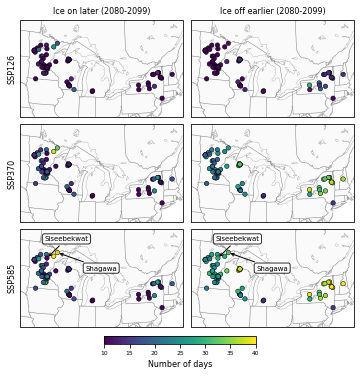

In [10]:
foo = dfssp.reset_index().groupby('lakecode').mean().merge(df_data0[['lakecode','lat','lon']].drop_duplicates(),
    left_index=True,right_on='lakecode')
lon_min,lon_max= foo.lon.min(),foo.lon.max()
dlon=1
dlat=2.5
#chsize = 10

linewidth = 0.5
symbol_size = 20 #40


figwidth = two_column_width*0.7 #183./25.4
left = 0.4 #inches
right = 0.2 #inches
wspace = 0.1
hspace = 0.1
top = 0.3
#bottom = 0.8
bottom = 0.6

nrows = 3
ncols = 2

axwidth = (figwidth - left - right - wspace*(ncols-1))/ncols
ratio = 0.595 # ???
axheight = axwidth*ratio

figheight = axheight*nrows + hspace*(nrows-1) + bottom + top

left = left/figwidth
right = 1 - right/figwidth

top = 1 - top / figheight
bottom = bottom / figheight

wspace = wspace / axwidth
hspace = hspace / axheight

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

fig,axes = plt.subplots(nrows,ncols,
                        subplot_kw = dict(projection=ccrs.AlbersEqualArea(
                            central_longitude=(lon_min+lon_max)/2.)),
                        figsize = (figwidth,figheight),sharex=True,sharey=True)
i = 0
for ax,c in zip(axes.flatten(),foo.columns[:6]):


    lat,lon = foo['lat'],foo['lon']
    
    ind1 = foo['lakecode'].isin(['MINN38'])
    ind0 = foo['lakecode'].isin(['xKB1640'])
    lat0,lon0 = lat[ind0].values[0],lon[ind0].values[0]
    lat1,lon1 = lat[ind1].values[0],lon[ind1].values[0]


    
    #ax.set_extent([lon.min()-dlon,lon.max()+dlon,lat.min()-dlat,lat.max()+dlat])
    #ax.add_feature(cfeature.LAND,color='0.98')
    ax.set_extent([lon.min()-dlon,lon.max()+dlon,lat.min()-dlat,lat.max()+dlat])
    water_110m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['water'])
    ax.add_feature(cfeature.LAND,color='0.98')
    ax.add_feature(cfeature.COASTLINE,lw=0.5, edgecolor='gray',alpha=0.5)

    ax.add_feature(water_110m,facecolor='1.0',edgecolor='gray',lw=linewidth,alpha=0.5)

    ax.add_feature(cfeature.BORDERS,lw=linewidth,edgecolor='gray')
    ax.add_feature(states_provinces, edgecolor='gray',lw=linewidth)
    

    if 'on' in c:
        vmin,vmax = 10,40
        cmap ='viridis'
        timing = 'later'
        sign = 1
    else:
        vmin,vmax = 10,40
        cmap = 'viridis'
        timing = 'earlier'
        sign = -1
    sc = ax.scatter(lon,lat,c=sign*foo[c],edgecolor='k',lw=0.5,cmap=cmap,s=symbol_size,
                    vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree(),zorder=5)
    if i > 3:
        sc0 = ax.scatter(lon0,lat0,marker='.',facecolor='black',edgecolor='none',lw=1,s=1,
                    vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree(),zorder=5,label='Siseebakwet')
        sc1 = ax.scatter(lon1,lat1,marker='.',facecolor='black',edgecolor='none',lw=1,s=1,
                    vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree(),zorder=5, label='Shagawa')
        
        transform = ccrs.PlateCarree()._as_mpl_transform(ax)
        #print(lon1,lat1)
        #print(transform)
        #ax.text(lon0,lat0,'Siseebekwat', 
        #        ha='center',va='bottom',
        #        transform = ccrs.PlateCarree())
        ax.annotate('Siseebekwat', xy=(lon0,lat0),xycoords=transform,
                    xytext=(0.15,0.9),textcoords='axes fraction',
                    arrowprops=dict(facecolor='black',
                                    arrowstyle='->',
                                    #connectionstyle="arc3,rad=+0.2",
                                    alpha=1,
                                    #width=1,
                                    #headwidth=0.2,
                                    #headlength=0.4,
                                    #shrink=0.05
                                   ),
                    fontsize=labelsize-1,
                    bbox=dict(boxstyle="round", fc="w",alpha=0.8),
                    #shrink=0.05,
                    ha='left',va='center',zorder=6)
        ax.annotate('Shagawa', xy=(lon1,lat1),xycoords=transform,
                    xytext=(0.4,0.6),textcoords='axes fraction',
                    arrowprops=dict(facecolor='black',
                                    arrowstyle='->',
                                    #connectionstyle="arc3,rad=-0.2",
                                    alpha=1,
                                    #width=1,
                                    #headwidth=2,
                                    #headlength=1,
                                    #shrink=0.05
                                   ),
                    #textprops=dict(weight='heavy'),
                    fontsize= labelsize-1,
                    bbox=dict(boxstyle="round", fc="w",alpha=0.8),
                    #shrink=0.05,
                    ha='left',va='center',zorder=6)
        #break
    
    if i < 2:
        ax.set_title(f"Ice {c.split('_')[1]} {timing} (2080-2099)",fontsize=labelsize)
    if i % 2==0:
        ax.text(-0.05 ,0.5,f"SSP{c.split('_')[0]}", ha='center',va='center',rotation=90,fontsize=labelsize, transform=ax.transAxes)
    i+=1
    #print(ax.bbox.height/ax.bbox.width)
fig.subplots_adjust(bottom=bottom,left=left,right=right,top=top,wspace=wspace,hspace=hspace)
cbar_ax = fig.add_axes([0.3, 0.07, 0.4, 0.02])
cb = fig.colorbar(sc, cax=cbar_ax,orientation='horizontal')
cb.set_label(label='Number of days', size=labelsize)
cb.ax.tick_params(labelsize=chsize)
fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/projected_iceon_spatial{mergedversion}.png',dpi=300)




In [38]:
for ssp in ['126','370','585']:
    print(ssp)
    print((dfssp[f'{ssp}_off'] - dfssp[f'{ssp}_on']).min())
    print((dfssp[f'{ssp}_off'] - dfssp[f'{ssp}_on']).max())
    print((dfssp[f'{ssp}_off'] - dfssp[f'{ssp}_on']).mean())

126
-67.85
2.9500000000000064
-18.149389355043223
370
-108.57894736842107
-15.499999999999996
-39.619423601618564
585
-117.73333333333333
-12.9
-46.053841409837744


In [12]:
foo[foo.lakecode.isin(['MINN38','xKB1640'])]

,126_on,126_off,370_on,370_off,585_on,585_off,lakecode,lat,lon
4614,17.476316,-11.090132,32.913816,-26.940132,38.663816,-32.365132,MINN38,47.91535,-91.88294
7014,3.775000,-8.212500,9.325000,-24.262500,10.637500,-29.562500,xKB1640,47.15701,-93.67103


In [18]:
foo[foo.lakecode.isin([l for l in foo.lakecode.unique() if l[:4]=='MINN'])]

,126_on,126_off,370_on,370_off,585_on,585_off,lakecode,lat,lon
4034,9.240000,-13.350000,13.670000,-29.550000,14.950000,-34.850000,MINN12,44.91000,-93.65300
4163,8.470000,-9.240000,16.440000,-23.980000,20.450000,-31.150000,MINN2,46.78300,-95.93300
4289,9.421053,-12.430000,23.881053,-28.270000,30.611053,-35.750000,MINN31,47.50506,-94.84514
4377,15.310000,-11.240000,28.230000,-26.460000,31.830000,-33.460000,MINN34,45.25231,-94.90525
4614,19.646316,-10.082632,38.336316,-29.252632,47.686316,-39.272632,MINN38,47.91535,-91.88294
4669,9.553077,-11.650769,17.043077,-26.250769,21.083077,-31.310769,MINN4,44.86869,-93.78393


In [19]:
ind = (foo.lat > 46.7) & (foo.lon > -94.8) & (foo.lon < -91.8)
foo[ind]

,126_on,126_off,370_on,370_off,585_on,585_off,lakecode,lat,lon
4614,19.646316,-10.082632,38.336316,-29.252632,47.686316,-39.272632,MINN38,47.91535,-91.88294
5532,27.876667,-12.976667,39.066667,-32.386667,44.836667,-42.016667,xKB0499,47.45062,-92.48107
5938,11.690000,-10.980000,22.500000,-27.210000,27.110000,-35.380000,xKB0798,47.58491,-93.82024
7014,4.830000,-14.600000,12.500000,-31.650000,15.510000,-38.700000,xKB1640,47.15701,-93.67103
